
# Анализ данных о поездках на такси в Перу

В этом проекте представленны данные по поездкам на такси в Перу. Данные разделены на три датасета: в `passengers` информация о поездках со стороны пассажиров, в `drivers` — об этих же поездках со стороны водителей, в `taxi_2` — и та, и та информация, но о других поездках. В каждой строке каждого датасета — запись об одной поездке.

## Описание данных:

passengers:
- journey_id – уникальный id поездки  
- user_id – id пользователя  
- start_type – тип заказа (asap, reserved, delayed)  
- start_lat – исходное местоположение пользователя, широта  
- start_lon – исходное местоположение пользователя, долгота  
- source – платформа, с которой сделан заказ  
- driver_score – какую оценку клиент поставил водителю  

drivers:
- journey_id – уникальный id поездки  
- driver_id – id водителя  
- taxi_id – id машины  
- icon – тип поездки  
- start_at – время начала поездки  
- end_at – время окончания поездки  
- end_lat – итоговое местоположение, широта  
- end_lon – итоговое местоположение, долгота  
- end_state – состояние заказа  
- driver_start_lat – исходное местоположение водителя, широта  
- driver_start_lon – исходное местоположение водителя, долгота  
- arrived_at – время прибытия водителя  
- rider_score – какую оценку водитель поставил клиенту  

## Цель: 
 1. Анализ данных о такси в Перу;
 2. Получение инсайтов для бизнес-решений.

## Задачи:
1. Определить долю заказов, сделанных с каждой уникальной платформы. И у какой платформы эта доля самая большая;
2.  Анализ оценок, которые ставят пассажиры водителям и водители пассажирам;
3. Анализ времени подачи машины;
4. Определить id водителя, который чаще всего опаздывал на заказы, заранее сделанные клиентами;
5. Определить сезонность заказов такси.

In [9]:
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
passengers_df = pd.read_csv('passengers.csv')
drivers_df    = pd.read_csv('drivers.csv')
taxi_df       = pd.read_csv('taxi_2.csv')
taxi_journey_df   = passengers_df.merge(drivers_df, how='inner', on='journey_id')
taxi_journey_df.info()
taxi_journey_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11555 entries, 0 to 11554
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   journey_id        11555 non-null  object 
 1   user_id           11555 non-null  object 
 2   start_type        11555 non-null  object 
 3   start_lat         11555 non-null  object 
 4   start_lon         11555 non-null  object 
 5   source            11500 non-null  object 
 6   driver_score      3151 non-null   float64
 7   driver_id         8170 non-null   object 
 8   taxi_id           8170 non-null   object 
 9   icon              11555 non-null  object 
 10  start_at          11555 non-null  object 
 11  end_at            11284 non-null  object 
 12  end_lat           11555 non-null  object 
 13  end_lon           11555 non-null  object 
 14  end_state         11543 non-null  object 
 15  driver_start_lat  8164 non-null   object 
 16  driver_start_lon  8164 non-null   object

(11555, 19)

#### Соединяем первую часть данных (объединенный датафрейм) со второй частью из датасета `taxi_2`.
Для этого сначала читаем датасет `taxi_2`. После этого соединяем первую, полученную на прошлом шаге, и вторую часть данных.

In [10]:
taxi = pd.read_csv('taxi_2.csv')
pd_new = pd.concat([journey_df, taxi])
pd_new

,journey_id,user_id,start_type,start_lat,start_lon,source,driver_score,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11551,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,reserved,"-12,08974075","-77,04699707",iPhone,5.0,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,2010-07-31 13:15:00,2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,5.0
11552,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,asap,"-12,09253011","-77,02875271",Android,NaN,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,2010-10-02 05:26:00,2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,5.0
11553,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,asap,"-12,1275637","-77,02642288",Android,0.0,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,2010-09-21 09:56:00,2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,0.0
11554,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,reserved,"-12,019468","-77,1077669",Android,NaN,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,2010-04-29 04:30:00,2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,5.0


#### Прежде чем перейти к анализу данных, проверяем, есть ли в них пропущенные значения.

(Пропущенные значения есть, их больше всего в колонке driver_score - 8404)

In [12]:
taxi_journey_df.isna().sum()



journey_id             0
user_id                0
start_type             0
start_lat              0
start_lon              0
source                55
driver_score        8404
driver_id           3385
taxi_id             3385
icon                   0
start_at               0
end_at               271
end_lat                0
end_lon                0
end_state             12
driver_start_lat    3391
driver_start_lon    3391
arrived_at          4175
rider_score         5141
dtype: int64

#### Посмотрим, сколько платформ есть в данных.

In [14]:
taxi_journey_df.source.nunique()


5

## Задача 1
#### Определим долю заказов, сделанных с каждой уникальной платформы. И у какой платформы эта доля самая большая. 

  Чтобы определить долю заказов, сделанных с той или иной платформы, посчитаем отношение количества заказов с конкретной платформы ко всему количеству заказов. Переведём значения в проценты и округлим.
  
(с платформы Android сделано больше всего заказов)

In [16]:
count_journey=taxi_journey_df['user_id'].count()
source_count_journey=taxi_journey_df.groupby('source').journey_id.count()
platform_share=((source_count_journey/count_journey)*100).round()
platform_share

source
Android    22.0
Wap         1.0
iPad        3.0
iPhone     43.0
web        32.0
Name: journey_id, dtype: float64

#### Построим график с количеством заказов на платформах. 

Считаем количество заказов, сделанных с той или иной платформы (см.колонку `source`).
Переименуем колонки, чтобы они назывались в соответствии с теми данными, которые в них содержатся: названия платформ и количество заказов.

In [17]:
source_count_journey=taxi_journey_df.groupby('source').journey_id.count().reset_index() \
    .rename(
     columns={'source':'platform',
         'journey_id':'count_journey'})
source_count_journey

,platform,count_journey
0,Android,2533
1,Wap,72
2,iPad,306
3,iPhone,4942
4,web,3647


Агрегируем данные и строим барчарт, где по оси `x` расположено название платформы (`source`), а по оси `y` – количество заказов (абсолютные значения, не доля).

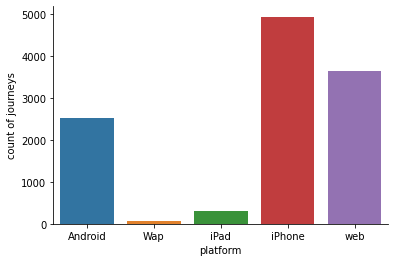

In [18]:
sns.barplot(data=source_count_journey, x='platform', y='count_journey')
plt.xlabel('platform')
plt.ylabel('count of journeys')
sns.despine()

#### Более детально проанализируем распределение заказов по платформам.

На основе неагрегированного датафрейма построим график с помощью функции sns.countplot: по оси `x` расположим платформу, в качестве цвета столбца (параметр `hue`) используем состояние заказа, а по оси `y` будет количество заказов.



(Посторив график, видим, что:

а. Больше всего заказов со статусом drop off совершено с платформы iPhone;

б. На Android количество отмененных поездок (rider cancel) меньше, чем на iPhone;

в. Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы iPhone.)

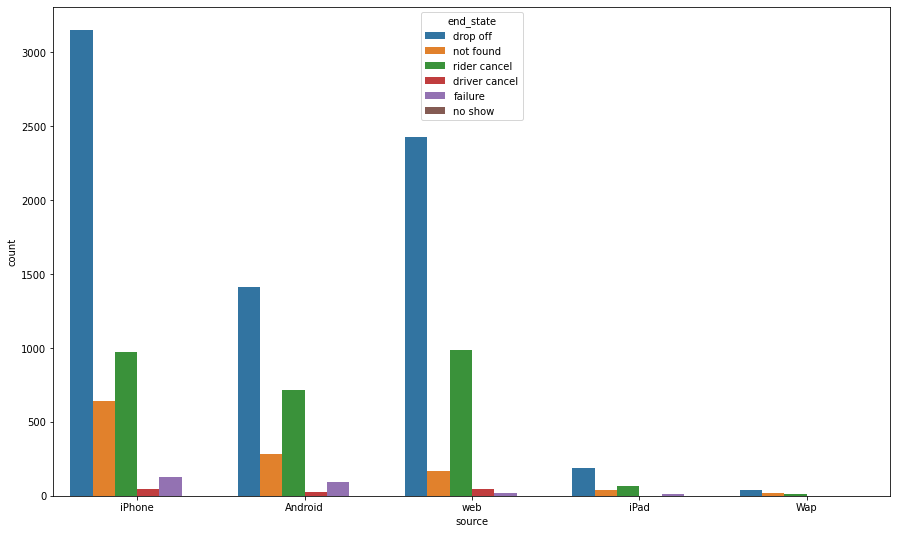

In [19]:
plt.figure(figsize=(15, 9))
sns.countplot(data = taxi_journey_df, x = 'source', hue = 'end_state')



## Задача 2
#### Анализ оценок, которые ставят пассажиры водителям и водители пассажирам.

Проверим, как распределены оценки водителей (см.колонку `driver_score`).

Посчитаем частоту встречаемости каждой из оценок и переведём значения в проценты, округлим.
Сбросим индекс и переименуем колонки в `driver_score` и `percentage`. Отсортируем датафрейм по колонке `driver_score` в порядке возрастания.

In [20]:
driver_score_counts = taxi_df.driver_score.value_counts(normalize = True).mul(100).round(2).reset_index() \
    .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
    .sort_values('driver_score', ascending=True)
driver_score_counts

,driver_score,percentage
2,0.0,13.71
4,1.0,1.31
5,2.0,0.82
3,3.0,3.00
1,4.0,21.25
0,5.0,59.90


#### Используя датафрейм `driver_score_counts`, строим круговую диаграмму и смотрим на долю каждой оценки.

<Figure size 576x576 with 0 Axes>

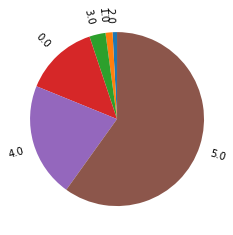

<Figure size 576x576 with 0 Axes>

In [21]:
driver_score_counts.sort_values('percentage', ascending=True, inplace = True)
plt.pie(driver_score_counts.percentage, startangle=90, rotatelabels=True, labels=driver_score_counts.driver_score)
plt.figure(figsize=(8, 8))

## Задача 2
#### Анализ оценок водителей пассажирам (см.колонку `rider_score`). 
Сравним распределение этих оценок с распределением оценок водителей.




(Более чем в 80% случаев водители поставили клиентам 5 звездочек.
 Водители ставят меньше оценок 0, чем клиенты)

Посчитаем частоту встречаемости каждой из оценок, сбросим индекс и переименуем колонки в `rider_score` и `percentage`.

In [32]:
taxi_new = taxi.rider_score.value_counts(normalize = True).mul(100).round(2).reset_index()
taxi_new = taxi_new.rename(columns={'index': 'rider_score', 'rider_score': 'percentage'})
rider_score_counts = taxi_new.sort_values('rider_score', ascending=True)

([<matplotlib.patches.Wedge at 0x7fadc95c3320>,
 [Text(-0.3888223589862553, -1.028988422263518, '5.0'),
  Text(0.5229502337696985, 0.9677412117917774, '4.0'),
  Text(0.2061194983972917, 1.0805159658146886, '0.0'),
  Text(0.07665556650997467, 1.0973258058220607, '3.0'),
  Text(0.02453385577727526, 1.0997263704761744, '2.0'),
  Text(0.007602645145737557, 1.0999737268620502, '1.0')])

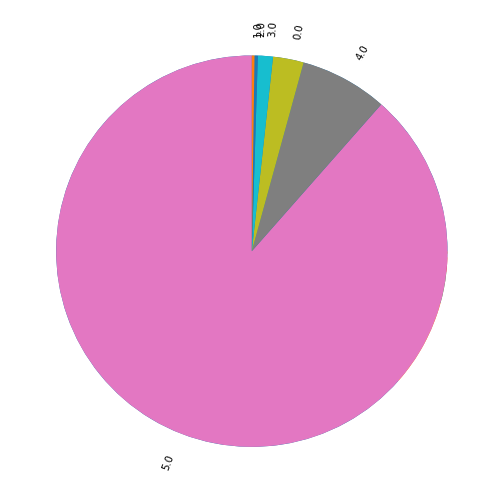

In [34]:
plt.figure(figsize=(16,9))
rider_score_counts.sort_values('percentage', ascending=False, inplace = True)
plt.pie(rider_score_counts.percentage)
plt.pie(rider_score_counts.percentage, startangle = 90, rotatelabels= True, labels = rider_score_counts.rider_score)

Приведём столбцы `start_at`, `end_at`, `arrived_at` к формату даты и времени.

In [35]:
taxi_journey_df.head()


,journey_id,user_id,start_type,start_lat,start_lon,source,driver_score,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0


In [36]:
taxi_journey_df[['start_at', 'end_at', 'arrived_at']] = taxi_journey_df[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)
taxi_journey_df

,journey_id,user_id,start_type,start_lat,start_lon,source,driver_score,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,b6206048fbda6d454ead4fa2b4948940,86aa09456b63a2a25e0097c55203cb59,asap,"-12,09699249","-77,04226685",iPhone,5.0,ae06c34243f741e203e97c48ebcbd9da,f6254a51b033dcea52c37c715b010474,executive,2010-11-29 13:27:00,2010-11-29 14:08:00,"-12,08663177","-76,99130249",drop off,"-12,09508341","-77,03027931",2010-11-29 13:42:00,5.0
11551,b6206048fbda6d454ead4fa2b4bd2ce5,27bd69801ce062f9b751502b38443d94,asap,"-12,105472","-77,018854",web,NaN,3abce16ea601affbeae8f50584ce72ef,ab6ee368af1a9e1293acc0d14d1f9338,executive,2010-11-29 15:29:00,2010-11-29 15:29:00,"-12,1012259","-77,037736",drop off,0,0,2010-11-29 15:29:00,5.0
11552,cd6fba80de11849ce566009f41dd6dfd,1199f830a03cd75df5e7a7cc7ca8a20c,asap,"-12,08918381","-76,97341919",iPhone,NaN,b66c43e298753a3d39220e53008a4325,b66c43e298753a3d39220e53008a4f19,executive,2010-11-28 22:28:00,2010-11-28 23:22:00,"-12,110672","-77,03985596",drop off,"-12,08397746","-76,96980433",2010-11-28 22:38:00,5.0
11553,d2cf43d9f47c6512b84e1ea7b8754a1d,ae06c34243f741e203e97c48eb62e6db,asap,"-12,0988425","-76,9706896",web,NaN,ecdcce0c956e266ed26c80fd9e5cbb8f,1d3c551d7fc3d0daf73f0a8c82781c2d,executive,2010-11-27 20:11:00,2010-11-27 20:31:00,"-12,15","-77,0166667",drop off,"-12,09828368","-76,97143374",2010-11-27 20:12:00,5.0


Отфильтруем данные и оставим наблюдения со статусами заказа «asap» и «reserved» (см.колонку `start_type`).

In [38]:
taxi = taxi_journey_df[taxi_journey_df['start_type'].isin(['asap', 'reserved'])]
taxi


,journey_id,user_id,start_type,start_lat,start_lon,source,driver_score,driver_id,taxi_id,icon,start_at,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,asap,"-12,13983536","-77,02355957",iPhone,5.0,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,2010-11-16 16:44:00,2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13874817","-76,99536133",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:34:00,2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,12453079","-77,02780151",iPhone,NaN,NaN,NaN,executive,2010-05-31 05:01:00,2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,asap,"-12,13885117","-76,99530029",iPhone,NaN,NaN,NaN,executive,2010-06-01 00:29:00,2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,reserved,"-12,08995438","-76,92626953",iPhone,4.0,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,2010-09-11 23:55:00,2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,b6206048fbda6d454ead4fa2b4948940,86aa09456b63a2a25e0097c55203cb59,asap,"-12,09699249","-77,04226685",iPhone,5.0,ae06c34243f741e203e97c48ebcbd9da,f6254a51b033dcea52c37c715b010474,executive,2010-11-29 13:27:00,2010-11-29 14:08:00,"-12,08663177","-76,99130249",drop off,"-12,09508341","-77,03027931",2010-11-29 13:42:00,5.0
11551,b6206048fbda6d454ead4fa2b4bd2ce5,27bd69801ce062f9b751502b38443d94,asap,"-12,105472","-77,018854",web,NaN,3abce16ea601affbeae8f50584ce72ef,ab6ee368af1a9e1293acc0d14d1f9338,executive,2010-11-29 15:29:00,2010-11-29 15:29:00,"-12,1012259","-77,037736",drop off,0,0,2010-11-29 15:29:00,5.0
11552,cd6fba80de11849ce566009f41dd6dfd,1199f830a03cd75df5e7a7cc7ca8a20c,asap,"-12,08918381","-76,97341919",iPhone,NaN,b66c43e298753a3d39220e53008a4325,b66c43e298753a3d39220e53008a4f19,executive,2010-11-28 22:28:00,2010-11-28 23:22:00,"-12,110672","-77,03985596",drop off,"-12,08397746","-76,96980433",2010-11-28 22:38:00,5.0
11553,d2cf43d9f47c6512b84e1ea7b8754a1d,ae06c34243f741e203e97c48eb62e6db,asap,"-12,0988425","-76,9706896",web,NaN,ecdcce0c956e266ed26c80fd9e5cbb8f,1d3c551d7fc3d0daf73f0a8c82781c2d,executive,2010-11-27 20:11:00,2010-11-27 20:31:00,"-12,15","-77,0166667",drop off,"-12,09828368","-76,97143374",2010-11-27 20:12:00,5.0


## Задача 3
### Анализ времени подачи машины — долго ли пассажиры ждут такси. 

Для этого создадим колонку `wait_time`, в которой будет храниться разница между временем подачи машины (см.колонку `arrived_at`) и временем заказа (см.колонку `start_at`). 
Определим медианное время подачи машины в минутах.

In [39]:
taxi_journey_df['wait_time']=taxi_journey_df.arrived_at - taxi_journey_df.start_at
taxi_journey_df.wait_time.median()

Timedelta('0 days 00:05:00')

## Задача 4
### Определим id водителя, который чаще всего опаздывал на заказы, заранее сделанные клиентами.

Если клиент сделал заказ к определенному времени (`start_type` == 'reserved'), но ему пришлось ждать машину (`wait_time` > 0), значит, водитель опоздал. 

In [40]:
time_difference = pd.to_timedelta(0)
taxi_journey_df.query("start_type=='reserved'and wait_time > @time_difference")
driver_cnt_delay = taxi_journey_df.driver_id.value_counts()
driver_cnt_delay.idxmax()

'd665fb9f75ef5d9cd0fd89479380ba78'

#### Добавим столбец `month`, где будет храниться номер месяца, в котором был сделан заказ (см.колонку `start_at`),  и столбец `weekday` – название дня недели.

In [41]:
taxi_journey_df['month']=taxi_journey_df.start_at.dt.month
taxi_journey_df['weekday']=taxi_journey_df.start_at.dt.day_name()

## Задача 5
### Есть ли сезонные колебания в заказах такси?
Чтобы понять это, построим график количества заказов по месяцам и определим месяц с наименьшим количеством заказов летом.

(В июле количество заказов было наименьшим)

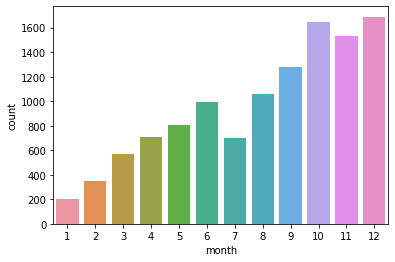

In [42]:
sns.countplot(data = taxi_journey_df, x = 'month')

#### Определим, в какой день недели поступает меньше всего заказов.

Для этого построим аналогичный график по дням недели (см. колонку `weekday`).

(по средам меньше всего заказов)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


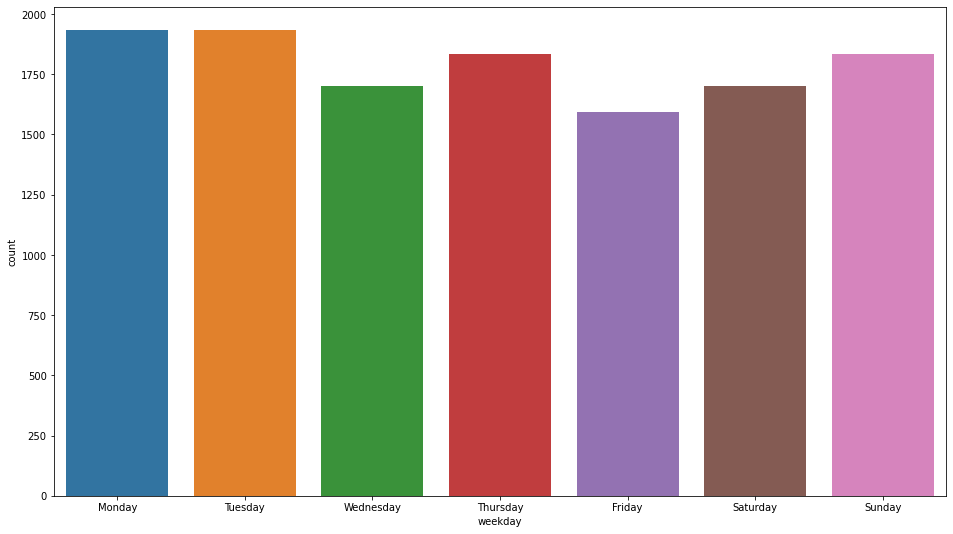

In [43]:
plt.figure(figsize=(16,9))  
sns.countplot(data = taxi_journey_df, x = 'weekday')
sns.countplot(taxi_journey_df['weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

## Итоги

В этом проекте мы собрали данные о поездках на такси в Перу в один датафрейм и проанализировали их в разрезе по платформам, построили графики и сравнили оценки водителей и пассажиров, определили самого опаздывающего водителя, посмотрели на годовую и недельную сезонность заказов. В процессе были закреплены навыки работы с временнЫми данными и библиотеками pandas, seaborn и matplotlib.

В ходе анализа данных решены следующие задачи:

1. Определены доли заказов, сделанных с каждой уникальной платформы. С платформы Android сделано больше всего заказов;
2. Более чем в 80% случаев водители поставили клиентам 5 звездочек. Водители ставят меньше оценок 0, чем клиенты;
3. Время подачи машины в среднем 5 минут;
4. Водитель с id d665fb9f75ef5d9cd0fd89479380ba78, чаще всего опаздывал на заказы, заранее сделанные клиентами;
5. Меньше всего заказов такси по средам и в июле.